<a href="https://colab.research.google.com/github/GentaKanno/irohacho/blob/main/irohacho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

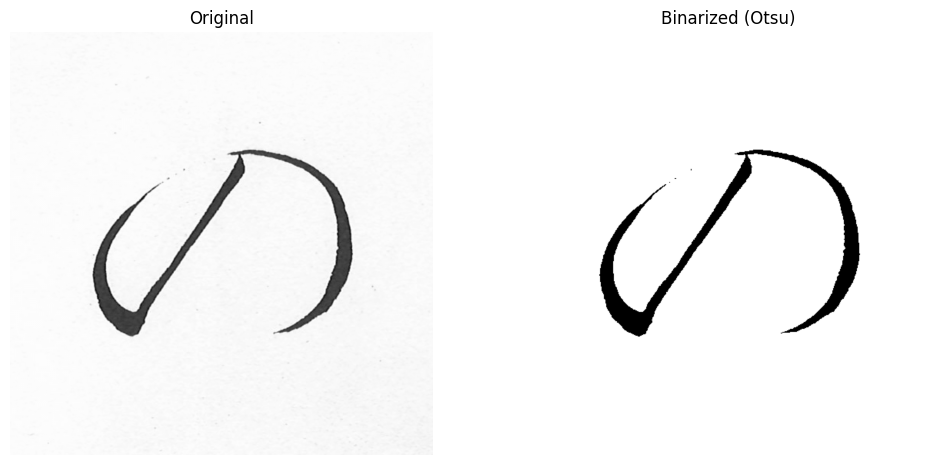

In [8]:
# 1. 必要なライブラリをインポート
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 4. 画像をグレースケールで読み込み
img = cv2.imread("no-hira.png", cv2.IMREAD_GRAYSCALE)

# 5. 二値化処理（大津の二値化法を使用）
# cv2.threshold(入力画像, 閾値, 最大値, 閾値処理タイプ)
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 6. 結果を表示
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Binarized (Otsu)")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.show()